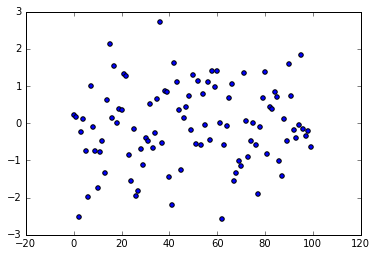

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def S0(size=100):
    x = np.arange(size)
    y = np.random.normal(0, 1, size=size)
    return x, y

x, y = S0()
plt.scatter(x, y);

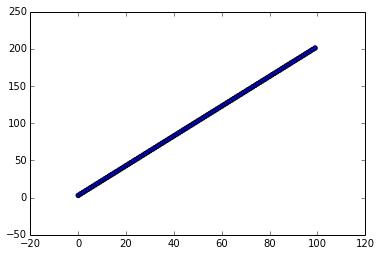

In [4]:
def S1(size=100):
    x = np.arange(size)
    y = 2*x + 3
    return x, y

x, y = S1()
plt.scatter(x, y);

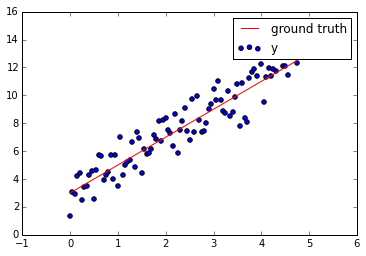

In [31]:
def S01(size=100, noise_level=1):
    x = np.arange(size)/20.
    y = 2*x + 3
    dataset = y + np.random.normal(0, noise_level, size=size)
    return x, y, dataset

x, y, dataset = S01()
plt.scatter(x, dataset, label='y')
plt.plot(x, y, 'r', label='ground truth')
plt.legend()

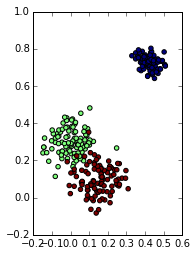

In [70]:
# size[0] - number of points
# size[1] - dimesion of points
def CD(n_classes=3, size=(100, 2)):
    # centers around which patterns will be distributed
    means = np.random.uniform(size=(n_classes, size[1]))
    # radiuses of distribution for each of classes
    stds = np.random.uniform(0, 0.2, size=n_classes)
    # generate array of 3 arrays, each contains 100 points
    # each point is normally distributed around generated mean
    # with generated distance
    X = [np.random.normal(m, s, size=size) for m, s in zip(means,stds)]
    # generate array of three arrays for labeling
    y = [[i] * size[0] for i in xrange(n_classes)]
    # make one matrix 300x2 from array of arrays
    X = np.vstack(X)
    # flatten the array of arrays
    y = np.ravel(y)
    return X, y

# for the same classes every time
np.random.seed(1)
X, y = CD()
# first column x of point, second - y
# y contains classes (colors)
plt.scatter(X[:,0], X[:,1], c=y)
# gca() - call the axes and set them to be equally zoomed
plt.gca().set_aspect(1.)

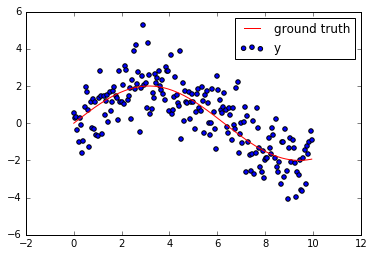

In [7]:
#task1
import math

def nonlinear(a, b, size=200, noise_level=1):
    x = np.arange(size)/20.
    y = [a*math.sin(b*xi) for xi in x]
    dataset = y + np.random.normal(0, noise_level, size=size)
    return x, y, dataset

x, y, dataset = nonlinear(2, 0.5)
plt.scatter(x, dataset, label='y')
plt.plot(x, y, 'r', label='ground truth')
plt.legend()

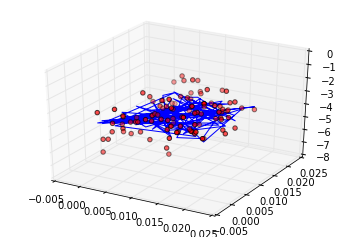

In [13]:
#task2
from mpl_toolkits.mplot3d import axes3d

def linear2dim(size=100, noise_level=1):
    x = np.random.rand(size)/50.
    y = np.random.rand(size)/50.
    
    z = 2*np.sin(x) - 4*np.cos(y)
    dataset = z + np.random.normal(0, noise_level, size=size)
    return x, y, z, dataset

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z, dataset = linear2dim()
ax.scatter(x, y, dataset, c='r')
ax.plot_wireframe(x, y, z, )

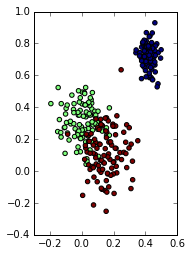

In [85]:
# task3
def nonisotropicCD(n_classes=3, size=(100, 2)):
    means = np.random.uniform(size=(n_classes, size[1]))
    # radiuses of distribution for each of coordinates for all classes
    stds = np.random.uniform(0, 0.2, size=(n_classes, size[1]))
    X = [np.random.normal(m, s, size=size[0]) for m, s in zip(means[:,0],stds[:,0])]
    Y = [np.random.normal(m, s, size=size[0]) for m, s in zip(means[:,1],stds[:,1])]
    classes = [[i] * size[0] for i in xrange(n_classes)]
#     works the same with or without flattening
#     X = np.ravel(X)
#     Y = np.ravel(Y)
#     classes = np.ravel(classes)
    return X, Y, classes

np.random.seed(1)
X, Y, classes = nonisotropicCD()
plt.scatter(X, Y, c=classes)
plt.gca().set_aspect(1.)

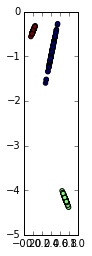

In [90]:
# task4
def correlatedCD(n_classes=3, size=(100, 2)):
    means = np.random.uniform(size=n_classes)
    stds = np.random.uniform(0, 0.2, size=n_classes)
    X = [np.random.normal(m, s, size=size[0]) for m, s in zip(means,stds)]
    coefs = np.random.uniform(-5, 5, size=(n_classes, 2))
    # make second coordinate a linear function of the first
    Y = [a[0] * x + a[1] for a, x in zip(coefs,X)]
    classes = [[i] * size[0] for i in xrange(n_classes)]
    return X, Y, classes

np.random.seed(1)
X, Y, classes = correlatedCD()
plt.scatter(X, Y, c=classes)
plt.gca().set_aspect(1.)

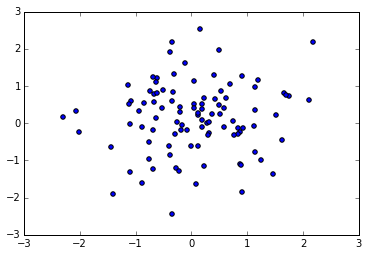

In [18]:
np.random.seed(1)
X = np.random.normal(0, 1, size=100)
Y = np.random.normal(0, 1, size=100)
plt.scatter(X, Y)

np.savetxt('test.txt', np.transpose([X,Y]), fmt='%6.3f')

# plt.scatter(2*X, 2*Y, c='r')

result = np.loadtxt('modified_test.txt')
# plt.scatter(result[:,0], result[:,1], c='r')